In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

Let's declare a bunch of constants

In [2]:
# 1D EDO for Fold bifurcation paramaters
a1 = -1
a2 = 1

# 2D EDO for Hopf bifurcation parameters
b1 = b2 = 1
c1 = -1
c2 = 1

# initial conditions
x0 = 0.0
y0 = 5.0
z0 = 5.0

r0 = 5.0

# time range
t_init = 0
t_fin = 200
time_step = 0.01

Let's write our EDOs

In [12]:
def fold(v, phi):
  return np.array([
    a1 * (v[0] ** 3) + a2 * v[0] + phi
  ])

def hopf(v, phi):
  return np.array([
    phi * v[0] - (v[0] ** 3),
  ])

# v is a vector \vec{v}: [x, y, z]
def fold_hopf(self, v, gamma, phi):
  return np.array([
    a1 * (v[0] ** 3) + a2 * v[0] + phi,
    b1*v[2] + b2*(gamma(v[0]) - (v[1]**2 + v[2]**2))*v[1],
    c1*v[1] + c2*(gamma(v[0]) - (v[1]**2 + v[2]**2))*v[2]
  ])

We use RK4 method to solve our non-linear systems of EDOs

In [13]:
def rk4_derivatives(edo, time_step, v, *args):
  k1 = edo(v, *args)
  k2 = edo(v + ((time_step / 2) * k1), *args)
  k3 = edo(v + ((time_step / 2) * k2), *args)
  k4 = edo(v + (time_step * k3), *args)
  return (k1 + 2*k2 + 2*k3 + k4)

def rk4(edo, time_step, v, *args):
  return (time_step / 6) * rk4_derivatives(edo, time_step, v, *args)

Time serie

In [17]:
class time_series():
  def __init__(self):
    # initial conditions
    self.initial_conditions = np.array([[x0, y0, z0]])
    # forcing parameter
    self.phi = -2
    # time
    self.t_init = t_init
    self.t_fin = t_fin
    self.time_step = time_step
    # data
    self.dataset = self.initial_conditions
    self.time_range = np.arange(t_init, t_fin + time_step, time_step)
    self.legends = ["$x$ (leading)", "$y$ (following)", "$z$ (following)"]

  # linear coupling parameter
  # proposed by Dekker et al. article
  def gamma(self, x):
    return (-0.1 + 0.12*x)

  def derivatives(self, tn, v):
    k1 = fold_hopf(self, tn, v)
    k2 = fold_hopf(self, tn + (self.time_step / 2), v + ((self.time_step / 2) * k1))
    k3 = fold_hopf(self, tn + (self.time_step / 2), v + ((self.time_step / 2) * k2))
    k4 = fold_hopf(self, tn + self.time_step, v + (self.time_step * k3))
    return (k1 + 2*k2 + 2*k3 + k4)

  def rk4(self):
    # [x0, y0, z0]
    v = self.initial_conditions[0]

    for t in self.time_range:
      if t == self.t_fin: break # LOL

      # increase forcing parameter
      self.phi += 0.01

      v += (self.time_step / 6) * self.derivatives(t, v)
      self.dataset = np.append(self.dataset, [v.copy()], axis=0)

    # results = solve_ivp(
    #   fun=fold_hopf,
    #   t_span=(self.t_init, self.t_fin),
    #   t_eval=self.time_range,
    #   y0=self.initial_conditions,
    #   first_step=self.time_step,
    #   method="RK45",
    #   args=(self.phi, self.gamma,)
    # )

    self.plot()

  def plot(self):
    fig, ax = plt.subplots()

    l1, = ax.plot(self.time_range, self.dataset[:,0])
    l2, = ax.plot(self.time_range, self.dataset[:,1])
    l3, = ax.plot(self.time_range, self.dataset[:,2])

    plt.xlabel("t")
    plt.ylabel("variables")
    plt.legend(self.legends, loc="upper right")
    plt.title("Fold-Hopf Bifurcation - Time serie")
    plt.show()

time_serie = time_series()
time_serie.rk4()

TypeError: fold_hopf() missing 1 required positional argument: 'phi'

Let's do our bifurcations

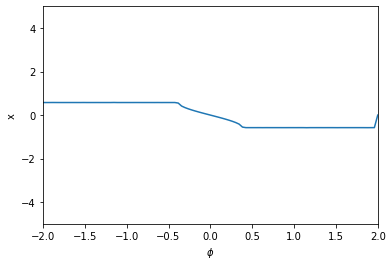

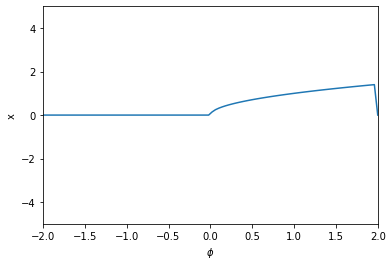

In [15]:
phi = 0
nphi = 100
phi_mesh = np.linspace(start=-2, stop=2, num=nphi)

# number of time steps
nt = int((t_fin - t_init) / time_step)
time_mesh = np.linspace(start=t_init, stop=t_fin, num=nt)

def fold_bifurcation():
    equilibria_mesh = np.zeros(nphi)

    # for each phi
    for phi_index in range(0, nphi-1):
      # # create mesh
      # x = np.zeros(self.nt)
      # # set initial conditions (for each phi value)
      # x[0] = x0

      # # simulate the system over time
      # for t in range(0, self.nt-1):
      #   x[t+1] = rk4(fold, time_step, t, x, self.phi_mesh[phi_index])

      # find the equilibria of our system
      equilibria = fsolve(func=fold, x0=[0.], args=(phi_mesh[phi_index]))

      # add to the mesh
      equilibria_mesh[phi_index] = equilibria

    plot(equilibria_mesh)

def hopf_bifurcation():
    equilibria_mesh = np.zeros(nphi)

    # for each phi
    for phi_index in range(0, nphi-1):
      # create mesh
      # x = np.zeros(self.nt)
      # # set initial conditions (for each phi value)
      # x[0] = x0

      # # simulate the system over time
      # for t in range(0, self.nt-1):
      #   x[t+1] = rk4(fold, time_step, t, x, self.phi_mesh[phi_index])

      # find the equilibria of our system
      equilibria = fsolve(func=hopf, x0=[1.], args=(phi_mesh[phi_index]))

      # add to the mesh
      equilibria_mesh[phi_index] = equilibria

    plot(equilibria_mesh)

def plot(dataset):
    plt.plot(phi_mesh, dataset)
    plt.xlabel("$\phi$")
    plt.ylabel("x")
    plt.xlim(-2,2)
    plt.ylim(-5,5)
    plt.show()
    
fold_bifurcation()
hopf_bifurcation()